# CODE2 
`contents`
1. GK-2A Dust RGB 처리를 위한 함수 / 라이브러리  
2. GK-2A Dust RGB : path / variable settings
3. GK-2A Dust RGB : np.files & figs by loop 

## 1. GK-2A 자료처리용 함수 / 라이브러리 

### `1-1. GK-2A 자료 처리를 위한 BT2IMAGE`

### `1-2. Import`

In [3]:
import glob, os, h5py
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.colors import ListedColormap
from PIL import Image

## 2. GK-2A Dust RGB path / variable settings

### `2-1.Path`

In [4]:
ipath        = "/media/data2/cy/SL2023/project4_team_project/data/"
ipath_latlon = ipath+"input_data1/latlon/"
ipath_lsmask = ipath+"input_data1/lsmask/"

# CODE1에서 산출한 output 파일 활용
ipath_l1b    = ipath+"output_01_bin/"
opath        = ipath_l1b

opath_dust_rgb = ipath+"output_02_rgb/"
opath_bin    = ipath+"output_02_rgb/"

### `2-2. Setting variables`

In [5]:
setting_year = '2020'

GK2A 자료처리를 위한 고정 변수 설정

In [6]:
#-------------------------------------------------------------------------------
# 자료 읽기를 위한 x, y dimension 상수 설정 
xdims_020= 5500 ; ydims_020= 5500 # 2km 공간 해상도

#-------------------------------------------------------------------------------
# Red, Green, Blue Channel
red_1_name   = 'ir124'
red_2_name   = 'ir105'
green_1_name = 'ir105'
green_2_name = 'ir087'
blue_name    = 'ir105'

#-------------------------------------------------------------------------------
# RGB recipe condition (# 경험적으로 결정된 상수)
red_min       =   -2.
red_max       =    2.5
green_min     =    0.
green_max     =   18.
blue_min      =  261.
blue_max      =  289.
red_gamma     =    1.0
green_gamma   =    1.85
blue_gamma    =    1.0

#-------------------------------------------------------------------------------
# Initializing Variables
red_1_raw_data   = 0
red_2_raw_data   = 0
green_1_raw_data = 0
green_2_raw_data = 0
blue_raw_data    = 0

red_1_data       = 0.
red_2_data       = 0.
green_1_data     = 0.
green_2_data     = 0.
blue_data        = 0.

`날짜 설정`

In [7]:
_ipath        = "/media/data2/cy/SL2023/project4_team_project/data/"
_ipath_l1b    = _ipath+f"input_data1/channel/Fulldisk/{setting_year}/"
len_files = len(sorted(glob.glob(_ipath_l1b+'/087/*.nc')))

In [9]:
# 리스트컴프리헨션을 이용한 gk2a_data_list 생성
gk2a_date_lst = [sorted(glob.glob(_ipath_l1b+'/087/*.nc'))[i].rpartition('_')[-1].rpartition('.')[0] for i in range(len_files)]

`위경도 및 마스크 설정`

In [14]:
# 위도, 경도, 육상/해상 마스크
gk2a_lat_2km    = np.fromfile(ipath_latlon+'Lat_2km.bin',dtype=np.float32).reshape(5500,5500)
gk2a_lon_2km    = np.fromfile(ipath_latlon+'Lon_2km.bin',dtype=np.float32).reshape(5500,5500)
gk2a_lsmask_2km = np.fromfile(ipath_lsmask+'lsmask_2km.bin',dtype=np.int16).reshape(5500,5500)
print("[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask")

[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask


## 3. Make the .np files & figs by loop

### `3-1.Make RGB np.array`

`2020`

In [44]:
for gk2a_date in gk2a_date_lst:
    ######################### 0. 자료 읽기 ###########################
    #-------------------------------------------------------------------------------
    #-------------------------------------------------------------------------------
    # 채널 자료
    fn_ir087 = f"{setting_year}/gk2a_ir087_{gk2a_date}.bin"
    data_ir087 = np.fromfile(ipath_l1b+fn_ir087, dtype=np.float32).reshape(5500,5500)

    fn_ir105 = f"{setting_year}/gk2a_ir105_{gk2a_date}.bin"
    data_ir105 = np.fromfile(ipath_l1b+fn_ir105, dtype=np.float32).reshape(5500,5500)

    fn_ir124 = f"{setting_year}/gk2a_ir124_{gk2a_date}.bin"
    data_ir124 = np.fromfile(ipath_l1b+fn_ir124, dtype=np.float32).reshape(5500,5500)
    print("[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data")





    ################## 1. GK-2A Dust-RGB 계산 ################################
    ####### 1-1. Min. / Max. / Gamma 값 설정 ###########
    # Calc. RED
    red_data = data_ir124 - data_ir105
    # Calc. GREEN
    green_data = data_ir105 - data_ir087
    # Calc. BLUE
    blue_data = data_ir105


    ######## 1-2. RED, GREEN, BLUE에 들어갈 입력값 0-255로 변환 ###########

    #-------------------------------------------------------------------------------
    # 각각의 채널 영상(밝기온도)을 0-255로 Scale로 변환  ==> 그림을 그리기 위함
    red_byte_data_tmp   = (255 * ((red_data - red_min) / (red_max - red_min))**(1./red_gamma)) # red_gamma는 색의 강도 조절
    green_byte_data_tmp = (255 * ((green_data - green_min) / (green_max - green_min))**(1./green_gamma)) # green_gamma는 색의 강도 조절
    blue_byte_data_tmp  = (255 * ((blue_data - blue_min) / (blue_max - blue_min))**(1./blue_gamma)) # blue_gamma는 색의 강도 조절

    #-------------------------------------------------------------------------------
    # -999 값이 있으면 0으로 할당: 필터링
    red_byte_data_tmp = np.where(gk2a_lsmask_2km == -999, 0, red_byte_data_tmp)
    green_byte_data_tmp = np.where(gk2a_lsmask_2km == -999, 0, green_byte_data_tmp)
    blue_byte_data_tmp = np.where(gk2a_lsmask_2km == -999, 0, blue_byte_data_tmp)

    # Norm BT가 0보다 작으면 0으로 할당: Min. Check
    red_byte_data_tmp = np.where(red_byte_data_tmp < 0, 0, red_byte_data_tmp)
    green_byte_data_tmp = np.where(green_byte_data_tmp < 0, 0, green_byte_data_tmp)
    blue_byte_data_tmp = np.where(blue_byte_data_tmp < 0, 0, blue_byte_data_tmp)

    # Norm BT가 255보다 크면 255로 할당: Max. Check
    red_byte_data_tmp = np.where(red_byte_data_tmp > 255, 255, red_byte_data_tmp)
    green_byte_data_tmp = np.where(green_byte_data_tmp > 255, 255, green_byte_data_tmp)
    blue_byte_data_tmp = np.where(blue_byte_data_tmp > 255, 255, blue_byte_data_tmp)

    # 실수형을  8 bit (1byte) 정수형으로 변환
    red_byte_data = red_byte_data_tmp.astype('uint8')   # 0~255 => -128 ~ +128
    green_byte_data = green_byte_data_tmp.astype('uint8')
    blue_byte_data = blue_byte_data_tmp.astype('uint8')

    # Dust RGB 결과값 출력
    f = open(opath_bin+f"{setting_year}/gk2a_ami_red_byte_fd020ge_"+gk2a_date+".bin", "w")
    red_byte_data.tofile(f)  
    f.close()

    f = open(opath_bin+f"{setting_year}/gk2a_ami_green_byte_fd020ge_"+gk2a_date+".bin", "w")
    green_byte_data.tofile(f)  
    f.close()

    f = open(opath_bin+f"{setting_year}/gk2a_ami_blue_byte_fd020ge_"+gk2a_date+".bin", "w")
    blue_byte_data.tofile(f)  
    f.close()

    ################# 2. GK-2A Dust-RGB 이미지화 ################################
    ####### 2-1. GK-2A DUST RGB 합성영상 생성 ###########
    lon_0 = 128.2
    m1 = Basemap(projection='geos',lon_0=lon_0,resolution=None)

    # np.zeros 함수를 이용하여 numpy 3차원 배열 8bit 정수형 자료 선언
    rgb_array=np.zeros((5500,5500,3), 'uint8')   # channel 3개 
    rgb_array[:,:,0] = red_byte_data  # X dimension * Y dimension * Channels
    rgb_array[:,:,1] = green_byte_data
    rgb_array[:,:,2] = blue_byte_data

    # 이미지 처리 라이브러리 PIL(Python Imaging Library)의 Image 클래스를 사용
    # Image.fromarray(rgb_array)는 NumPy 배열을 이미지로 변환하는 함수
    # 입력값은 8bit 3차원 자료
    # rgb_png = Image.fromarray(rgb_array)

    np.save(opath_dust_rgb + f"image_{setting_year}/" + gk2a_date + f'{setting_year}_rgb_array.npy', rgb_array)
    print(f"{gk2a_date} : All code complete")

[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003010000 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003010100 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003010200 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003010300 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003010400 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003010500 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003010600 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003010700 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003010800 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003010900 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


202003011000 : All code complete
[Reading complete] : GK-2A/AMI Latitude, Longitude, Land/Sea Mask
[Reading complete] : GK-2A/AMI IR 8.7, 10.5, 12.4 micrometer data


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in power


KeyboardInterrupt: 

In [ ]:
# 11개 2분 
# ((24*7)/11) *2 = 약 30분 소요..

### `3-2.Plots_East Asia`

In [10]:
############### Dust 23 ###############
# 폴더에서 2023 npy 파일 로드
npy2023_folder = opath_dust_rgb + f"/image_2023/"
npy2023_files = [f for f in os.listdir(npy2023_folder) if f.endswith(".npy")]

# 누적 변수 초기화
total_rgb_array = np.zeros((5500, 5500, 3), dtype='float64')
num_arrays = 0

# 모든 npy 파일에 대해 루프
for npy_file in npy2023_files:
    # npy 파일 로드
    rgb_array = np.load(os.path.join(npy2023_folder, npy_file))

    # 누적
    total_rgb_array += rgb_array
    num_arrays += 1

# 최종적인 평균 계산
dust23_rgb_array = total_rgb_array / num_arrays





############### Dust 20 ###############
# 폴더에서 2020 npy 파일 로드
npy2020_folder = opath_dust_rgb + f"/image_2020/"
npy2020_files = [f for f in os.listdir(npy2020_folder) if f.endswith(".npy")]

# 누적 변수 초기화
total_rgb_array = np.zeros((5500, 5500, 3), dtype='float64')
num_arrays = 0

# 모든 npy 파일에 대해 루프
for npy_file in npy2020_files:
    # npy 파일 로드
    rgb_array = np.load(os.path.join(npy2020_folder, npy_file))

    # 누적
    total_rgb_array += rgb_array
    num_arrays += 1

# 최종적인 평균 계산
dust20_rgb_array = total_rgb_array / num_arrays

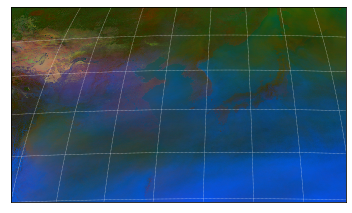

In [30]:
############## Dust20 : EastAsia #############

setting_year="2020"
# 위도 및 경도 범위 설정
lat_min, lat_max = 25, 50
lon_min, lon_max = 105, 145

# 위도와 경도에 따라 해당하는 인덱스를 찾음
idx_lat = np.where((gk2a_lat_2km >= lat_min) & (gk2a_lat_2km <= lat_max))
idx_lon = np.where((gk2a_lon_2km >= lon_min) & (gk2a_lon_2km <= lon_max))

# 위도와 경도 인덱스에서 최소값과 최대값을 찾음
min_idx_lat, max_idx_lat = np.min(idx_lat[0]), np.max(idx_lat[0])
min_idx_lon, max_idx_lon = np.min(idx_lon[1]), np.max(idx_lon[1])

# 해당 영역만 이미지에서 잘라냄
rgb_array_cropped = dust20_rgb_array[min_idx_lat:max_idx_lat+1, min_idx_lon:max_idx_lon+1]

# 잘라낸 이미지를 사용하여 PIL 이미지 객체 생성
rgb_png_cropped20 = rgb_array_cropped.astype('uint8')


map2 = Basemap(projection='geos',lon_0=127.5,resolution='i', \
               area_thresh=10000., satellite_height=35785863.0, \
               rsphere=(6378137.0 , 6356752.3 ), \
               llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)

# map2.drawcoastlines(linewidth=0.2, color='yellow')
# map2.drawcountries(linewidth=0.2, color='yellow')
map2.drawparallels(np.arange(lat_min, lat_max, 5), linewidth=0.4, color = 'w')
map2.drawmeridians(np.arange(lon_min, lon_max, 5), linewidth=0.4,color = 'w')
map2.imshow(rgb_png_cropped20, interpolation='nearest', origin='upper')

savefig(opath_dust_rgb +f'{setting_year}_dust_rgb_EastAisa.png', dpi = 300, bbox_inches='tight')
show()


/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


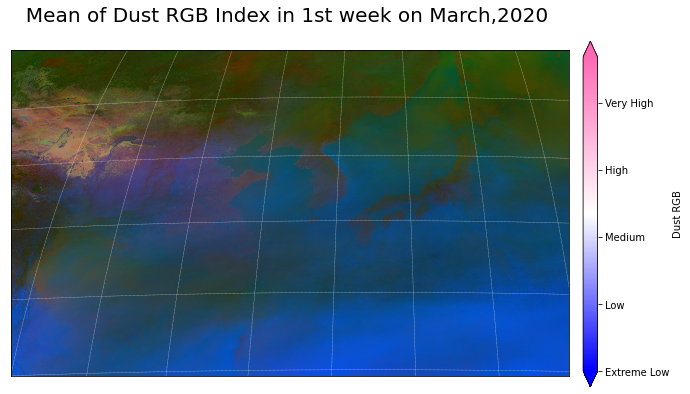

In [31]:
# 위도 및 경도 범위 설정
lat_min, lat_max = 25, 50
lon_min, lon_max = 105, 145


# Custom colormap emphasizing pink for higher values
colors = [(0, 'blue'), (0.5, 'white'), (1, 'hotpink')]  # You can adjust the positions and colors as needed
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Draw the map
map2 = Basemap(projection='geos', lon_0=127.5, resolution='i',
               area_thresh=10000., satellite_height=35785863.0,
               rsphere=(6378137.0, 6356752.3),
               llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)

map2.drawparallels(np.arange(lat_min, lat_max, 5), linewidth=0.4, color='w')
map2.drawmeridians(np.arange(lon_min, lon_max, 5), linewidth=0.4, color='w')

# Plot the cropped image with the custom colormap
img = map2.imshow(rgb_png_cropped20, interpolation='nearest', origin='upper', cmap=custom_cmap)

# Add colorbar
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(img, cax=cax, extend='both')
cbar.set_label('Dust RGB')

# Set tick labels
ticklabels = ['Extreme Low', 'Low','Medium', 'High', 'Very High', 'Extreme']
cbar.set_ticklabels(ticklabels)

plt.suptitle('  Mean of Dust RGB Index in 1st week on March,2020', fontsize=20)
plt.savefig(opath_dust_rgb + f'{setting_year}_dust_rgb_EastAisa_with_cbar.png', dpi=300, bbox_inches='tight')
plt.show()

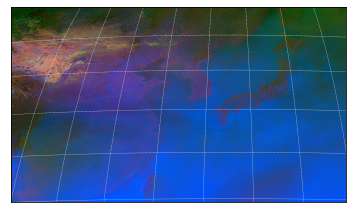

In [27]:
############## Dust23 : EastAsia #############
setting_year="2023"
# 위도 및 경도 범위 설정
lat_min, lat_max = 25, 50
lon_min, lon_max = 105, 145

# 위도와 경도에 따라 해당하는 인덱스를 찾음
idx_lat = np.where((gk2a_lat_2km >= lat_min) & (gk2a_lat_2km <= lat_max))
idx_lon = np.where((gk2a_lon_2km >= lon_min) & (gk2a_lon_2km <= lon_max))

# 위도와 경도 인덱스에서 최소값과 최대값을 찾음
min_idx_lat, max_idx_lat = np.min(idx_lat[0]), np.max(idx_lat[0])
min_idx_lon, max_idx_lon = np.min(idx_lon[1]), np.max(idx_lon[1])

# 해당 영역만 이미지에서 잘라냄
rgb_array_cropped = dust23_rgb_array[min_idx_lat:max_idx_lat+1, min_idx_lon:max_idx_lon+1]

# 잘라낸 이미지를 사용하여 PIL 이미지 객체 생성
rgb_png_cropped23 = rgb_array_cropped.astype('uint8')


map2 = Basemap(projection='geos',lon_0=127.5,resolution='i', \
               area_thresh=10000., satellite_height=35785863.0, \
               rsphere=(6378137.0 , 6356752.3 ), \
               llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)

# map2.drawcoastlines(linewidth=0.2, color='yellow')
# map2.drawcountries(linewidth=0.2, color='yellow')
map2.drawparallels(np.arange(lat_min, lat_max, 5), linewidth=0.4, color = 'w')
map2.drawmeridians(np.arange(lon_min, lon_max, 5), linewidth=0.4,color = 'w')
map2.imshow(rgb_png_cropped23, interpolation='nearest', origin='upper')

savefig(opath_dust_rgb +f'{setting_year}_dust_rgb_EastAisa.png', dpi = 300, bbox_inches='tight')
show()

/home/shim/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


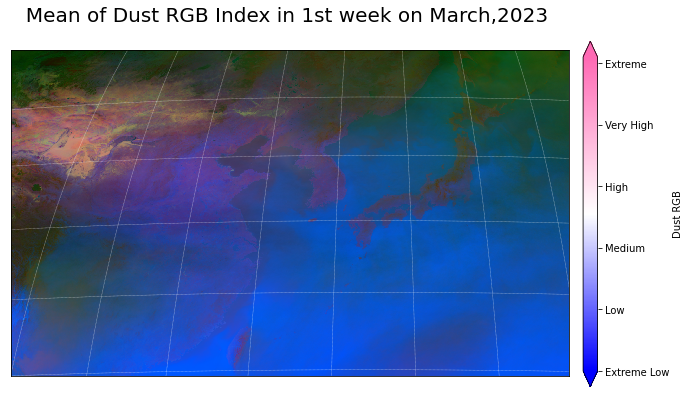

In [29]:
# 위도 및 경도 범위 설정
lat_min, lat_max = 25, 50
lon_min, lon_max = 105, 145


# Custom colormap emphasizing pink for higher values
colors = [(0, 'blue'), (0.5, 'white'), (1, 'hotpink')]  # You can adjust the positions and colors as needed
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Draw the map
map2 = Basemap(projection='geos', lon_0=127.5, resolution='i',
               area_thresh=10000., satellite_height=35785863.0,
               rsphere=(6378137.0, 6356752.3),
               llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)

map2.drawparallels(np.arange(lat_min, lat_max, 5), linewidth=0.4, color='w')
map2.drawmeridians(np.arange(lon_min, lon_max, 5), linewidth=0.4, color='w')

# Plot the cropped image with the custom colormap
img = map2.imshow(rgb_png_cropped23, interpolation='nearest', origin='upper', cmap=custom_cmap)

# Add colorbar
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(img, cax=cax, extend='both')
cbar.set_label('Dust RGB')

# Set tick labels
ticklabels = ['Extreme Low', 'Low','Medium', 'High', 'Very High', 'Extreme']
cbar.set_ticklabels(ticklabels)

plt.suptitle('  Mean of Dust RGB Index in 1st week on March,2023', fontsize=20)
plt.savefig(opath_dust_rgb + f'{setting_year}_dust_rgb_EastAisa_with_cbar.png', dpi=300, bbox_inches='tight')
plt.show()

### `3-3.Make change arrays & plots`
- Change of Dust = Dust23-Dust20

In [26]:
###############  Lon, Lat settings ###################3
lat_min, lat_max = 25, 50
lon_min, lon_max = 105, 145

# 위도와 경도에 따라 해당하는 인덱스를 찾음
idx_lat = np.where((gk2a_lat_2km >= lat_min) & (gk2a_lat_2km <= lat_max))
idx_lon = np.where((gk2a_lon_2km >= lon_min) & (gk2a_lon_2km <= lon_max))

# 위도와 경도 인덱스에서 최소값과 최대값을 찾음
min_idx_lat, max_idx_lat = np.min(idx_lat[0]), np.max(idx_lat[0])
min_idx_lon, max_idx_lon = np.min(idx_lon[1]), np.max(idx_lon[1])



########## Change Dust Index #############
# 최종적인 평균 계산
dust_change_rgb_array = (dust23_rgb_array-dust20_rgb_array)
rgb_array_cropped = dust_change_rgb_array[min_idx_lat:max_idx_lat+1, min_idx_lon:max_idx_lon+1]
dust_change_unit8 = (rgb_array_cropped.clip(0, 255)).astype('uint8')





# 이미지로 변환하고 저장
average_rgb_png = Image.fromarray(dust_change_unit8)
# average_rgb_png.save(opath_dust_rgb + f"/dust_change_rgb_image_Fulldisk.png")
average_rgb_png.save(opath_dust_rgb + f"/dust_change_rgb_image_EastAsia.png")


average_rgb_png.show()

`Writer : Chae-Yeon, Shim`  
`Original Code : Jong-Min, Yeom`